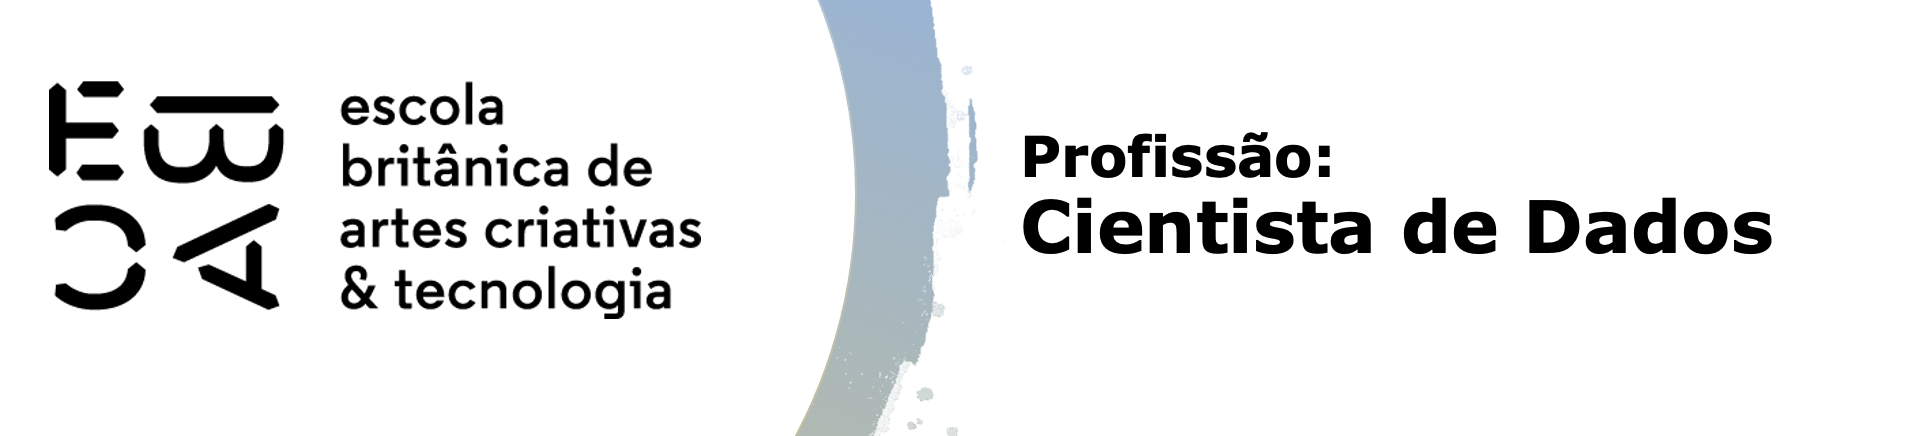

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
x_treino = pd.read_csv('./csv/treino/x_treino.csv')

y_treino = pd.read_csv('./csv/treino/y_treino.csv')

x_teste = pd.read_csv('./csv/teste/x_teste.csv')

y_teste = pd.read_csv('./csv/teste/y_teste.csv')

In [3]:
y_teste.drop(columns='Unnamed: 0', axis=1, inplace=True)
y_treino.drop(columns='Unnamed: 0', axis=1, inplace=True)
x_teste.drop(columns='Unnamed: 0', axis=1, inplace=True)
x_treino.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [4]:
x_treino.drop(columns='subject.1', axis=1, inplace=True)

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [5]:
x_treino_simp = x_treino[['tGravityAcc-min()-X','fBodyAcc-energy()-X','tGravityAcc-mean()-Y']]

In [6]:
x_teste_simp = x_teste[['tGravityAcc-min()-X','fBodyAcc-energy()-X','tGravityAcc-mean()-Y']]

In [7]:
%%time
arv1 = DecisionTreeClassifier(min_samples_leaf=20, random_state=100)

path = arv1.cost_complexity_pruning_path(x_treino_simp,y_treino)

ccp_alpha, impurities = path.ccp_alphas , path.impurities

CPU times: user 31 ms, sys: 0 ns, total: 31 ms
Wall time: 30.4 ms


In [8]:
grid_parametros = {'ccp_alpha':ccp_alpha}

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [9]:
%%time

grid = GridSearchCV(arv1 ,param_grid=grid_parametros,cv=10, verbose=100 )
grid.fit(x_treino_simp,y_treino)

Fitting 10 folds for each of 104 candidates, totalling 1040 fits
[CV 1/10; 1/104] START ccp_alpha=0.0............................................
[CV 1/10; 1/104] END ..........................ccp_alpha=0.0; total time=   0.0s
[CV 2/10; 1/104] START ccp_alpha=0.0............................................
[CV 2/10; 1/104] END ..........................ccp_alpha=0.0; total time=   0.0s
[CV 3/10; 1/104] START ccp_alpha=0.0............................................
[CV 3/10; 1/104] END ..........................ccp_alpha=0.0; total time=   0.0s
[CV 4/10; 1/104] START ccp_alpha=0.0............................................
[CV 4/10; 1/104] END ..........................ccp_alpha=0.0; total time=   0.0s
[CV 5/10; 1/104] START ccp_alpha=0.0............................................
[CV 5/10; 1/104] END ..........................ccp_alpha=0.0; total time=   0.0s
[CV 6/10; 1/104] START ccp_alpha=0.0............................................
[CV 6/10; 1/104] END .......................

[CV 1/10; 6/104] END ........ccp_alpha=8.839051887938405e-06; total time=   0.0s
[CV 2/10; 6/104] START ccp_alpha=8.839051887938405e-06..........................
[CV 2/10; 6/104] END ........ccp_alpha=8.839051887938405e-06; total time=   0.0s
[CV 3/10; 6/104] START ccp_alpha=8.839051887938405e-06..........................
[CV 3/10; 6/104] END ........ccp_alpha=8.839051887938405e-06; total time=   0.0s
[CV 4/10; 6/104] START ccp_alpha=8.839051887938405e-06..........................
[CV 4/10; 6/104] END ........ccp_alpha=8.839051887938405e-06; total time=   0.0s
[CV 5/10; 6/104] START ccp_alpha=8.839051887938405e-06..........................
[CV 5/10; 6/104] END ........ccp_alpha=8.839051887938405e-06; total time=   0.0s
[CV 6/10; 6/104] START ccp_alpha=8.839051887938405e-06..........................
[CV 6/10; 6/104] END ........ccp_alpha=8.839051887938405e-06; total time=   0.0s
[CV 7/10; 6/104] START ccp_alpha=8.839051887938405e-06..........................
[CV 7/10; 6/104] END .......

[CV 6/10; 11/104] END .......ccp_alpha=3.348120867163328e-05; total time=   0.0s
[CV 7/10; 11/104] START ccp_alpha=3.348120867163328e-05.........................
[CV 7/10; 11/104] END .......ccp_alpha=3.348120867163328e-05; total time=   0.0s
[CV 8/10; 11/104] START ccp_alpha=3.348120867163328e-05.........................
[CV 8/10; 11/104] END .......ccp_alpha=3.348120867163328e-05; total time=   0.0s
[CV 9/10; 11/104] START ccp_alpha=3.348120867163328e-05.........................
[CV 9/10; 11/104] END .......ccp_alpha=3.348120867163328e-05; total time=   0.0s
[CV 10/10; 11/104] START ccp_alpha=3.348120867163328e-05........................
[CV 10/10; 11/104] END ......ccp_alpha=3.348120867163328e-05; total time=   0.0s
[CV 1/10; 12/104] START ccp_alpha=3.5645941990919135e-05........................
[CV 1/10; 12/104] END ......ccp_alpha=3.5645941990919135e-05; total time=   0.0s
[CV 2/10; 12/104] START ccp_alpha=3.5645941990919135e-05........................
[CV 2/10; 12/104] END ......

[CV 7/10; 16/104] END ......ccp_alpha=5.7070242053920196e-05; total time=   0.0s
[CV 8/10; 16/104] START ccp_alpha=5.7070242053920196e-05........................
[CV 8/10; 16/104] END ......ccp_alpha=5.7070242053920196e-05; total time=   0.0s
[CV 9/10; 16/104] START ccp_alpha=5.7070242053920196e-05........................
[CV 9/10; 16/104] END ......ccp_alpha=5.7070242053920196e-05; total time=   0.0s
[CV 10/10; 16/104] START ccp_alpha=5.7070242053920196e-05.......................
[CV 10/10; 16/104] END .....ccp_alpha=5.7070242053920196e-05; total time=   0.0s
[CV 1/10; 17/104] START ccp_alpha=5.8711771814416985e-05........................
[CV 1/10; 17/104] END ......ccp_alpha=5.8711771814416985e-05; total time=   0.0s
[CV 2/10; 17/104] START ccp_alpha=5.8711771814416985e-05........................
[CV 2/10; 17/104] END ......ccp_alpha=5.8711771814416985e-05; total time=   0.0s
[CV 3/10; 17/104] START ccp_alpha=5.8711771814416985e-05........................
[CV 3/10; 17/104] END ......

[CV 9/10; 21/104] END .......ccp_alpha=8.090690780833713e-05; total time=   0.0s
[CV 10/10; 21/104] START ccp_alpha=8.090690780833713e-05........................
[CV 10/10; 21/104] END ......ccp_alpha=8.090690780833713e-05; total time=   0.0s
[CV 1/10; 22/104] START ccp_alpha=8.360094482337652e-05.........................
[CV 1/10; 22/104] END .......ccp_alpha=8.360094482337652e-05; total time=   0.0s
[CV 2/10; 22/104] START ccp_alpha=8.360094482337652e-05.........................
[CV 2/10; 22/104] END .......ccp_alpha=8.360094482337652e-05; total time=   0.0s
[CV 3/10; 22/104] START ccp_alpha=8.360094482337652e-05.........................
[CV 3/10; 22/104] END .......ccp_alpha=8.360094482337652e-05; total time=   0.0s
[CV 4/10; 22/104] START ccp_alpha=8.360094482337652e-05.........................
[CV 4/10; 22/104] END .......ccp_alpha=8.360094482337652e-05; total time=   0.0s
[CV 5/10; 22/104] START ccp_alpha=8.360094482337652e-05.........................
[CV 5/10; 22/104] END ......

[CV 10/10; 26/104] END .....ccp_alpha=0.00011146792643116873; total time=   0.0s
[CV 1/10; 27/104] START ccp_alpha=0.00011425462459194809........................
[CV 1/10; 27/104] END ......ccp_alpha=0.00011425462459194809; total time=   0.1s
[CV 2/10; 27/104] START ccp_alpha=0.00011425462459194809........................
[CV 2/10; 27/104] END ......ccp_alpha=0.00011425462459194809; total time=   0.1s
[CV 3/10; 27/104] START ccp_alpha=0.00011425462459194809........................
[CV 3/10; 27/104] END ......ccp_alpha=0.00011425462459194809; total time=   0.0s
[CV 4/10; 27/104] START ccp_alpha=0.00011425462459194809........................
[CV 4/10; 27/104] END ......ccp_alpha=0.00011425462459194809; total time=   0.1s
[CV 5/10; 27/104] START ccp_alpha=0.00011425462459194809........................
[CV 5/10; 27/104] END ......ccp_alpha=0.00011425462459194809; total time=   0.0s
[CV 6/10; 27/104] START ccp_alpha=0.00011425462459194809........................
[CV 6/10; 27/104] END ......

[CV 4/10; 32/104] END ......ccp_alpha=0.00015391540009594348; total time=   0.1s
[CV 5/10; 32/104] START ccp_alpha=0.00015391540009594348........................
[CV 5/10; 32/104] END ......ccp_alpha=0.00015391540009594348; total time=   0.0s
[CV 6/10; 32/104] START ccp_alpha=0.00015391540009594348........................
[CV 6/10; 32/104] END ......ccp_alpha=0.00015391540009594348; total time=   0.1s
[CV 7/10; 32/104] START ccp_alpha=0.00015391540009594348........................
[CV 7/10; 32/104] END ......ccp_alpha=0.00015391540009594348; total time=   0.1s
[CV 8/10; 32/104] START ccp_alpha=0.00015391540009594348........................
[CV 8/10; 32/104] END ......ccp_alpha=0.00015391540009594348; total time=   0.1s
[CV 9/10; 32/104] START ccp_alpha=0.00015391540009594348........................
[CV 9/10; 32/104] END ......ccp_alpha=0.00015391540009594348; total time=   0.0s
[CV 10/10; 32/104] START ccp_alpha=0.00015391540009594348.......................
[CV 10/10; 32/104] END .....

[CV 1/10; 38/104] END .......ccp_alpha=0.0002448313384113168; total time=   0.0s
[CV 2/10; 38/104] START ccp_alpha=0.0002448313384113168.........................
[CV 2/10; 38/104] END .......ccp_alpha=0.0002448313384113168; total time=   0.0s
[CV 3/10; 38/104] START ccp_alpha=0.0002448313384113168.........................
[CV 3/10; 38/104] END .......ccp_alpha=0.0002448313384113168; total time=   0.0s
[CV 4/10; 38/104] START ccp_alpha=0.0002448313384113168.........................
[CV 4/10; 38/104] END .......ccp_alpha=0.0002448313384113168; total time=   0.0s
[CV 5/10; 38/104] START ccp_alpha=0.0002448313384113168.........................
[CV 5/10; 38/104] END .......ccp_alpha=0.0002448313384113168; total time=   0.0s
[CV 6/10; 38/104] START ccp_alpha=0.0002448313384113168.........................
[CV 6/10; 38/104] END .......ccp_alpha=0.0002448313384113168; total time=   0.0s
[CV 7/10; 38/104] START ccp_alpha=0.0002448313384113168.........................
[CV 7/10; 38/104] END ......

[CV 6/10; 43/104] END ........ccp_alpha=0.000316912071380578; total time=   0.0s
[CV 7/10; 43/104] START ccp_alpha=0.000316912071380578..........................
[CV 7/10; 43/104] END ........ccp_alpha=0.000316912071380578; total time=   0.0s
[CV 8/10; 43/104] START ccp_alpha=0.000316912071380578..........................
[CV 8/10; 43/104] END ........ccp_alpha=0.000316912071380578; total time=   0.0s
[CV 9/10; 43/104] START ccp_alpha=0.000316912071380578..........................
[CV 9/10; 43/104] END ........ccp_alpha=0.000316912071380578; total time=   0.0s
[CV 10/10; 43/104] START ccp_alpha=0.000316912071380578.........................
[CV 10/10; 43/104] END .......ccp_alpha=0.000316912071380578; total time=   0.0s
[CV 1/10; 44/104] START ccp_alpha=0.00034872743281032497........................
[CV 1/10; 44/104] END ......ccp_alpha=0.00034872743281032497; total time=   0.0s
[CV 2/10; 44/104] START ccp_alpha=0.00034872743281032497........................
[CV 2/10; 44/104] END ......

[CV 8/10; 48/104] END ......ccp_alpha=0.00042353165312904173; total time=   0.0s
[CV 9/10; 48/104] START ccp_alpha=0.00042353165312904173........................
[CV 9/10; 48/104] END ......ccp_alpha=0.00042353165312904173; total time=   0.0s
[CV 10/10; 48/104] START ccp_alpha=0.00042353165312904173.......................
[CV 10/10; 48/104] END .....ccp_alpha=0.00042353165312904173; total time=   0.0s
[CV 1/10; 49/104] START ccp_alpha=0.0004352557127312298.........................
[CV 1/10; 49/104] END .......ccp_alpha=0.0004352557127312298; total time=   0.0s
[CV 2/10; 49/104] START ccp_alpha=0.0004352557127312298.........................
[CV 2/10; 49/104] END .......ccp_alpha=0.0004352557127312298; total time=   0.0s
[CV 3/10; 49/104] START ccp_alpha=0.0004352557127312298.........................
[CV 3/10; 49/104] END .......ccp_alpha=0.0004352557127312298; total time=   0.0s
[CV 4/10; 49/104] START ccp_alpha=0.0004352557127312298.........................
[CV 4/10; 49/104] END ......

[CV 10/10; 53/104] END .......ccp_alpha=0.000476633220402505; total time=   0.0s
[CV 1/10; 54/104] START ccp_alpha=0.0004913508682451539.........................
[CV 1/10; 54/104] END .......ccp_alpha=0.0004913508682451539; total time=   0.0s
[CV 2/10; 54/104] START ccp_alpha=0.0004913508682451539.........................
[CV 2/10; 54/104] END .......ccp_alpha=0.0004913508682451539; total time=   0.0s
[CV 3/10; 54/104] START ccp_alpha=0.0004913508682451539.........................
[CV 3/10; 54/104] END .......ccp_alpha=0.0004913508682451539; total time=   0.0s
[CV 4/10; 54/104] START ccp_alpha=0.0004913508682451539.........................
[CV 4/10; 54/104] END .......ccp_alpha=0.0004913508682451539; total time=   0.0s
[CV 5/10; 54/104] START ccp_alpha=0.0004913508682451539.........................
[CV 5/10; 54/104] END .......ccp_alpha=0.0004913508682451539; total time=   0.0s
[CV 6/10; 54/104] START ccp_alpha=0.0004913508682451539.........................
[CV 6/10; 54/104] END ......

[CV 3/10; 59/104] END .......ccp_alpha=0.0006439548335446665; total time=   0.0s
[CV 4/10; 59/104] START ccp_alpha=0.0006439548335446665.........................
[CV 4/10; 59/104] END .......ccp_alpha=0.0006439548335446665; total time=   0.0s
[CV 5/10; 59/104] START ccp_alpha=0.0006439548335446665.........................
[CV 5/10; 59/104] END .......ccp_alpha=0.0006439548335446665; total time=   0.0s
[CV 6/10; 59/104] START ccp_alpha=0.0006439548335446665.........................
[CV 6/10; 59/104] END .......ccp_alpha=0.0006439548335446665; total time=   0.0s
[CV 7/10; 59/104] START ccp_alpha=0.0006439548335446665.........................
[CV 7/10; 59/104] END .......ccp_alpha=0.0006439548335446665; total time=   0.0s
[CV 8/10; 59/104] START ccp_alpha=0.0006439548335446665.........................
[CV 8/10; 59/104] END .......ccp_alpha=0.0006439548335446665; total time=   0.0s
[CV 9/10; 59/104] START ccp_alpha=0.0006439548335446665.........................
[CV 9/10; 59/104] END ......

[CV 8/10; 64/104] END .......ccp_alpha=0.0007496532718287243; total time=   0.0s
[CV 9/10; 64/104] START ccp_alpha=0.0007496532718287243.........................
[CV 9/10; 64/104] END .......ccp_alpha=0.0007496532718287243; total time=   0.0s
[CV 10/10; 64/104] START ccp_alpha=0.0007496532718287243........................
[CV 10/10; 64/104] END ......ccp_alpha=0.0007496532718287243; total time=   0.0s
[CV 1/10; 65/104] START ccp_alpha=0.0007756311366822104.........................
[CV 1/10; 65/104] END .......ccp_alpha=0.0007756311366822104; total time=   0.0s
[CV 2/10; 65/104] START ccp_alpha=0.0007756311366822104.........................
[CV 2/10; 65/104] END .......ccp_alpha=0.0007756311366822104; total time=   0.0s
[CV 3/10; 65/104] START ccp_alpha=0.0007756311366822104.........................
[CV 3/10; 65/104] END .......ccp_alpha=0.0007756311366822104; total time=   0.0s
[CV 4/10; 65/104] START ccp_alpha=0.0007756311366822104.........................
[CV 4/10; 65/104] END ......

[CV 4/10; 70/104] END .......ccp_alpha=0.0009088259075121204; total time=   0.0s
[CV 5/10; 70/104] START ccp_alpha=0.0009088259075121204.........................
[CV 5/10; 70/104] END .......ccp_alpha=0.0009088259075121204; total time=   0.0s
[CV 6/10; 70/104] START ccp_alpha=0.0009088259075121204.........................
[CV 6/10; 70/104] END .......ccp_alpha=0.0009088259075121204; total time=   0.0s
[CV 7/10; 70/104] START ccp_alpha=0.0009088259075121204.........................
[CV 7/10; 70/104] END .......ccp_alpha=0.0009088259075121204; total time=   0.0s
[CV 8/10; 70/104] START ccp_alpha=0.0009088259075121204.........................
[CV 8/10; 70/104] END .......ccp_alpha=0.0009088259075121204; total time=   0.0s
[CV 9/10; 70/104] START ccp_alpha=0.0009088259075121204.........................
[CV 9/10; 70/104] END .......ccp_alpha=0.0009088259075121204; total time=   0.0s
[CV 10/10; 70/104] START ccp_alpha=0.0009088259075121204........................
[CV 10/10; 70/104] END .....

[CV 8/10; 75/104] END .......ccp_alpha=0.0010939643660631952; total time=   0.0s
[CV 9/10; 75/104] START ccp_alpha=0.0010939643660631952.........................
[CV 9/10; 75/104] END .......ccp_alpha=0.0010939643660631952; total time=   0.0s
[CV 10/10; 75/104] START ccp_alpha=0.0010939643660631952........................
[CV 10/10; 75/104] END ......ccp_alpha=0.0010939643660631952; total time=   0.0s
[CV 1/10; 76/104] START ccp_alpha=0.0012862306432446045.........................
[CV 1/10; 76/104] END .......ccp_alpha=0.0012862306432446045; total time=   0.0s
[CV 2/10; 76/104] START ccp_alpha=0.0012862306432446045.........................
[CV 2/10; 76/104] END .......ccp_alpha=0.0012862306432446045; total time=   0.0s
[CV 3/10; 76/104] START ccp_alpha=0.0012862306432446045.........................
[CV 3/10; 76/104] END .......ccp_alpha=0.0012862306432446045; total time=   0.0s
[CV 4/10; 76/104] START ccp_alpha=0.0012862306432446045.........................
[CV 4/10; 76/104] END ......

[CV 4/10; 81/104] END ........ccp_alpha=0.001929685588790633; total time=   0.0s
[CV 5/10; 81/104] START ccp_alpha=0.001929685588790633..........................
[CV 5/10; 81/104] END ........ccp_alpha=0.001929685588790633; total time=   0.0s
[CV 6/10; 81/104] START ccp_alpha=0.001929685588790633..........................
[CV 6/10; 81/104] END ........ccp_alpha=0.001929685588790633; total time=   0.0s
[CV 7/10; 81/104] START ccp_alpha=0.001929685588790633..........................
[CV 7/10; 81/104] END ........ccp_alpha=0.001929685588790633; total time=   0.0s
[CV 8/10; 81/104] START ccp_alpha=0.001929685588790633..........................
[CV 8/10; 81/104] END ........ccp_alpha=0.001929685588790633; total time=   0.0s
[CV 9/10; 81/104] START ccp_alpha=0.001929685588790633..........................
[CV 9/10; 81/104] END ........ccp_alpha=0.001929685588790633; total time=   0.0s
[CV 10/10; 81/104] START ccp_alpha=0.001929685588790633.........................
[CV 10/10; 81/104] END .....

[CV 6/10; 86/104] END .......ccp_alpha=0.0021441248378416683; total time=   0.0s
[CV 7/10; 86/104] START ccp_alpha=0.0021441248378416683.........................
[CV 7/10; 86/104] END .......ccp_alpha=0.0021441248378416683; total time=   0.0s
[CV 8/10; 86/104] START ccp_alpha=0.0021441248378416683.........................
[CV 8/10; 86/104] END .......ccp_alpha=0.0021441248378416683; total time=   0.0s
[CV 9/10; 86/104] START ccp_alpha=0.0021441248378416683.........................
[CV 9/10; 86/104] END .......ccp_alpha=0.0021441248378416683; total time=   0.0s
[CV 10/10; 86/104] START ccp_alpha=0.0021441248378416683........................
[CV 10/10; 86/104] END ......ccp_alpha=0.0021441248378416683; total time=   0.0s
[CV 1/10; 87/104] START ccp_alpha=0.0024483947008874223.........................
[CV 1/10; 87/104] END .......ccp_alpha=0.0024483947008874223; total time=   0.0s
[CV 2/10; 87/104] START ccp_alpha=0.0024483947008874223.........................
[CV 2/10; 87/104] END ......

[CV 3/10; 92/104] END ........ccp_alpha=0.003544449365513184; total time=   0.0s
[CV 4/10; 92/104] START ccp_alpha=0.003544449365513184..........................
[CV 4/10; 92/104] END ........ccp_alpha=0.003544449365513184; total time=   0.0s
[CV 5/10; 92/104] START ccp_alpha=0.003544449365513184..........................
[CV 5/10; 92/104] END ........ccp_alpha=0.003544449365513184; total time=   0.0s
[CV 6/10; 92/104] START ccp_alpha=0.003544449365513184..........................
[CV 6/10; 92/104] END ........ccp_alpha=0.003544449365513184; total time=   0.0s
[CV 7/10; 92/104] START ccp_alpha=0.003544449365513184..........................
[CV 7/10; 92/104] END ........ccp_alpha=0.003544449365513184; total time=   0.0s
[CV 8/10; 92/104] START ccp_alpha=0.003544449365513184..........................
[CV 8/10; 92/104] END ........ccp_alpha=0.003544449365513184; total time=   0.0s
[CV 9/10; 92/104] START ccp_alpha=0.003544449365513184..........................
[CV 9/10; 92/104] END ......

[CV 9/10; 97/104] END .........ccp_alpha=0.00711085882054991; total time=   0.0s
[CV 10/10; 97/104] START ccp_alpha=0.00711085882054991..........................
[CV 10/10; 97/104] END ........ccp_alpha=0.00711085882054991; total time=   0.0s
[CV 1/10; 98/104] START ccp_alpha=0.007963249652870229..........................
[CV 1/10; 98/104] END ........ccp_alpha=0.007963249652870229; total time=   0.0s
[CV 2/10; 98/104] START ccp_alpha=0.007963249652870229..........................
[CV 2/10; 98/104] END ........ccp_alpha=0.007963249652870229; total time=   0.0s
[CV 3/10; 98/104] START ccp_alpha=0.007963249652870229..........................
[CV 3/10; 98/104] END ........ccp_alpha=0.007963249652870229; total time=   0.0s
[CV 4/10; 98/104] START ccp_alpha=0.007963249652870229..........................
[CV 4/10; 98/104] END ........ccp_alpha=0.007963249652870229; total time=   0.0s
[CV 5/10; 98/104] START ccp_alpha=0.007963249652870229..........................
[CV 5/10; 98/104] END ......

[CV 4/10; 103/104] END ........ccp_alpha=0.16682245790651284; total time=   0.0s
[CV 5/10; 103/104] START ccp_alpha=0.16682245790651284..........................
[CV 5/10; 103/104] END ........ccp_alpha=0.16682245790651284; total time=   0.0s
[CV 6/10; 103/104] START ccp_alpha=0.16682245790651284..........................
[CV 6/10; 103/104] END ........ccp_alpha=0.16682245790651284; total time=   0.0s
[CV 7/10; 103/104] START ccp_alpha=0.16682245790651284..........................
[CV 7/10; 103/104] END ........ccp_alpha=0.16682245790651284; total time=   0.0s
[CV 8/10; 103/104] START ccp_alpha=0.16682245790651284..........................
[CV 8/10; 103/104] END ........ccp_alpha=0.16682245790651284; total time=   0.0s
[CV 9/10; 103/104] START ccp_alpha=0.16682245790651284..........................
[CV 9/10; 103/104] END ........ccp_alpha=0.16682245790651284; total time=   0.0s
[CV 10/10; 103/104] START ccp_alpha=0.16682245790651284.........................
[CV 10/10; 103/104] END ....

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=100),
             param_grid={'ccp_alpha': array([0.00000000e+00, 5.48129862e-06, 6.80087051e-06, 7.12472149e-06,
       7.59681192e-06, 8.83905189e-06, 9.35119695e-06, 1.04385454e-05,
       1.18579281e-05, 1.63420185e-05, 3.34812087e-05, 3.56459420e-05,
       3.87639710e-05, 5.09274489e-05, 5.58810444e-05, 5.70...
       1.92968559e-03, 1.96791440e-03, 1.98977285e-03, 2.08959714e-03,
       2.14003998e-03, 2.14412484e-03, 2.44839470e-03, 2.57869151e-03,
       2.59963436e-03, 2.62838430e-03, 3.29787531e-03, 3.54444937e-03,
       4.43036816e-03, 4.44758937e-03, 5.13540155e-03, 5.96668682e-03,
       7.11085882e-03, 7.96324965e-03, 1.00216442e-02, 4.54316636e-02,
       7.51006073e-02, 1.09180351e-01, 1.66822458e-01, 1.86138242e-01])},
             verbose=100)

In [10]:
resultados = pd.DataFrame(grid.cv_results_)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028862,0.003443,0.003931,0.001521,0.0,{'ccp_alpha': 0.0},0.728261,0.754076,0.823129,0.727891,0.806803,0.775510,0.761905,0.719728,0.846259,0.783673,0.772723,0.040617,69
1,0.035384,0.008995,0.004505,0.001167,0.000005,{'ccp_alpha': 5.481298621149127e-06},0.728261,0.754076,0.823129,0.727891,0.806803,0.775510,0.761905,0.719728,0.846259,0.783673,0.772723,0.040617,69
2,0.029713,0.002134,0.004187,0.001045,0.000007,{'ccp_alpha': 6.800870511425316e-06},0.728261,0.754076,0.823129,0.727891,0.806803,0.775510,0.761905,0.719728,0.846259,0.783673,0.772723,0.040617,69
3,0.032876,0.003388,0.004971,0.001583,0.000007,{'ccp_alpha': 7.124721488159969e-06},0.728261,0.754076,0.823129,0.727891,0.806803,0.775510,0.761905,0.719728,0.846259,0.783673,0.772723,0.040617,69
4,0.040650,0.005521,0.005729,0.002036,0.000008,{'ccp_alpha': 7.596811916438175e-06},0.728261,0.754076,0.823129,0.727891,0.806803,0.775510,0.761905,0.719728,0.846259,0.783673,0.772723,0.040617,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.027850,0.001544,0.003160,0.000779,0.045432,{'ccp_alpha': 0.04543166361522155},0.737772,0.785326,0.782313,0.778231,0.774150,0.862585,0.772789,0.783673,0.791837,0.734694,0.780337,0.033063,29
100,0.027947,0.001846,0.003242,0.000678,0.075101,{'ccp_alpha': 0.07510060732235285},0.737772,0.657609,0.693878,0.629932,0.653061,0.715646,0.770068,0.780952,0.677551,0.708844,0.702531,0.047539,101
101,0.028561,0.002921,0.003544,0.001044,0.10918,{'ccp_alpha': 0.10918035118757238},0.546196,0.657609,0.546939,0.629932,0.653061,0.544218,0.544218,0.540136,0.677551,0.635374,0.597523,0.054545,102
102,0.027570,0.001809,0.003219,0.000838,0.166822,{'ccp_alpha': 0.16682245790651284},0.379076,0.546196,0.379592,0.545578,0.378231,0.378231,0.378231,0.540136,0.376871,0.376871,0.427901,0.076004,103


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [11]:
grid.best_score_

0.8109294587400177

In [12]:
melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp,
                             min_samples_leaf=20).fit(x_treino_simp, y_treino)

Acurácia: 74.62


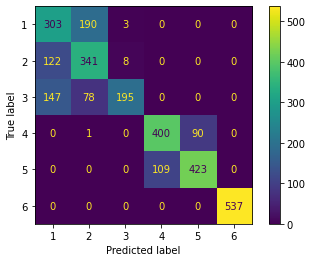

In [13]:
acuracia_teste = clf.score(x_teste_simp, y_teste)

print(f'Acurácia: {acuracia_teste*100:.2f}')
plot_confusion_matrix(clf, x_teste_simp, y_teste);

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [14]:
clf1 = DecisionTreeClassifier().fit(x_treino,y_treino)

In [15]:
x = clf1.feature_importances_

In [16]:
resultado = pd.DataFrame({'features': x}, index=x_treino.columns).sort_values(by='features')

In [17]:
resultado = resultado[resultado['features']>0]
    

In [18]:
resultado

,features
"fBodyGyro-bandsEnergy()-49,64",0.000064
"tGravityAcc-correlation()-X,Z",0.000081
tGravityAcc-iqr()-X,0.000109
tBodyAcc-entropy()-Y,0.000109
"fBodyAcc-bandsEnergy()-49,56.1",0.000161
...,...
"tGravityAcc-arCoeff()-Z,2",0.096173
fBodyAccMag-energy(),0.109366
"angle(Y,gravityMean)",0.132345
fBodyAcc-mean()-X,0.201659


In [19]:
#a variável que será utilizada será fBodyGyro-bandsEnergy()-49,64, por causa da sua pequena importancia
# e vou eliminar todas que deram zero (zero importância)

In [20]:
resultado.index

Index(['fBodyGyro-bandsEnergy()-49,64', 'tGravityAcc-correlation()-X,Z',
       'tGravityAcc-iqr()-X', 'tBodyAcc-entropy()-Y',
       'fBodyAcc-bandsEnergy()-49,56.1', 'tBodyGyro-arCoeff()-Z,4',
       'fBodyGyro-kurtosis()-Z', 'tGravityAcc-correlation()-Y,Z',
       'tBodyGyroJerk-arCoeff()-Z,3', 'fBodyAccJerk-iqr()-Y',
       ...
       'fBodyAcc-max()-Y', 'tBodyAccMag-arCoeff()1',
       'tBodyGyro-correlation()-Y,Z', 'tGravityAcc-energy()-Y',
       'fBodyGyro-maxInds-X', 'tGravityAcc-arCoeff()-Z,2',
       'fBodyAccMag-energy()', 'angle(Y,gravityMean)', 'fBodyAcc-mean()-X',
       'tGravityAcc-min()-X'],
      dtype='object', length=128)

In [21]:
x_treino_mod = x_treino[resultado.index]

In [22]:
x_treino_mod.shape

(7352, 128)

In [23]:
x_teste_mod = x_teste[resultado.index]

In [24]:

x_treino_mod['fBodyGyro-bandsEnergy()-49,64_bool'] = np.random.randint(2, size=7352)
    

<ipython-input-24-0d8885d3b812>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_treino_mod['fBodyGyro-bandsEnergy()-49,64_bool'] = np.random.randint(2, size=7352)


In [25]:
x_treino_mod.drop(columns='fBodyGyro-bandsEnergy()-49,64' , axis =1, inplace=True)

/home/lucas/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
x_teste_mod.shape

(2947, 128)

In [27]:
x_teste_mod['fBodyGyro-bandsEnergy()-49,64_bool'] = np.random.randint(2, size=2947)

<ipython-input-27-37c6e8c02b29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_teste_mod['fBodyGyro-bandsEnergy()-49,64_bool'] = np.random.randint(2, size=2947)


In [28]:
x_teste_mod.drop(columns='fBodyGyro-bandsEnergy()-49,64', axis =1, inplace=True)

In [29]:
clf_mod = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20,
                                random_state=100).fit(x_treino_mod,y_treino)

In [30]:
path = clf_mod.cost_complexity_pruning_path(x_treino_mod,y_treino)

In [31]:
arvores = []
for a in path.ccp_alphas:
    arvore = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4 , random_state=100, ccp_alpha=a)
    clf = arvore.fit(x_treino_mod,y_treino)
    arvores.append(clf)


In [33]:
treino = []
for clf in arvores:
    t= clf.score(x_treino_mod,y_treino)
    treino.append(t)

teste = []
for clf in arvores:
    t= clf.score(x_teste_mod,y_teste)
    teste.append(t)

In [34]:
ind_melhor_arvore = len(teste) - teste[::-1].index(max(teste)) - 1
melhor_arvore = arvores[ind_melhor_arvore]

Acurácia: 81.95


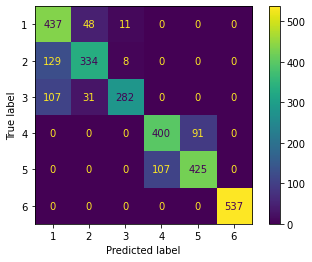

In [35]:
acuracia_teste = melhor_arvore.score(x_teste_mod, y_teste)

print(f'Acurácia: {acuracia_teste*100:.2f}')
plot_confusion_matrix(melhor_arvore, x_teste_mod, y_teste);


In [36]:
#rodadar o resultados.tails para ver as tres variaveis com maior importância

In [37]:
resultado.tail()

,features
"tGravityAcc-arCoeff()-Z,2",0.096173
fBodyAccMag-energy(),0.109366
"angle(Y,gravityMean)",0.132345
fBodyAcc-mean()-X,0.201659
tGravityAcc-min()-X,0.239945


In [39]:
x_treino_mod2 = x_treino[['angle(Y,gravityMean)','fBodyAcc-mean()-X','tGravityAcc-min()-X']]
x_teste_mod2 = x_teste[['angle(Y,gravityMean)','fBodyAcc-mean()-X','tGravityAcc-min()-X']]

In [40]:
clf_mod2 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20,
                                random_state=100).fit(x_treino_mod2,y_treino)

In [42]:
path2 = clf_mod2.cost_complexity_pruning_path(x_treino_mod2,y_treino)

In [43]:
arvores2 = []
for a in path2.ccp_alphas:
    arvore = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4 , random_state=100, ccp_alpha=a)
    clf = arvore.fit(x_treino_mod2,y_treino)
    arvores2.append(clf)

In [45]:
treino2 = []
for clf in arvores2:
    t= clf.score(x_treino_mod2,y_treino)
    treino2.append(t)

teste2 = []
for clf in arvores2:
    t= clf.score(x_teste_mod2,y_teste)
    teste2.append(t)

In [46]:
ind_melhor_arvore2 = len(teste2) - teste2[::-1].index(max(teste2)) - 1
melhor_arvore = arvores2[ind_melhor_arvore2]

Acurácia: 73.70


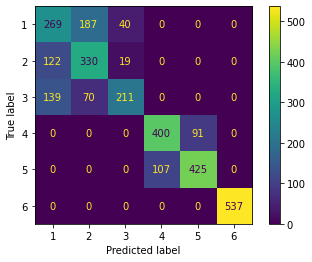

In [47]:
acuracia_teste2 = melhor_arvore.score(x_teste_mod2, y_teste)

print(f'Acurácia: {acuracia_teste2*100:.2f}')
plot_confusion_matrix(melhor_arvore, x_teste_mod2, y_teste);

In [48]:
x_treino.shape

(7352, 562)

In [ ]:
'''a acurácia eliminando as varíaveis menos relevantes,
mostrou que o resultado é bem superior do que considerando apenas as tres melhores variáveis
resultado esperado, três variáveis, são poucas, comparadas ao universo de 562, no teste utilizando, apox
1/5 da base de dados, o resultado obteve um ganho de quase 10%'''